<a href="https://colab.research.google.com/github/dreyan22/pytorch-deep-learning-adrian/blob/Computer-Vision/CSCI_118-03_Histogram_Image_Enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
import requests

# URL of the image you want to download
image_url = "https://static1.srcdn.com/wordpress/wp-content/uploads/2017/08/Game-of-Thrones-Jon-Snow-Battle-of-Bastards-e1558806989767.jpg"

# Send a GET request to the image URL
response = requests.get(image_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Open the file in binary mode and write the image data
    with open("/content/sample.jpg", "wb") as file:
        file.write(response.content)
    print("Image downloaded and saved as sample.jpg in /content")
else:
    print("Failed to download the image. Status code:", response.status_code)

Image downloaded and saved as sample.jpg in /content


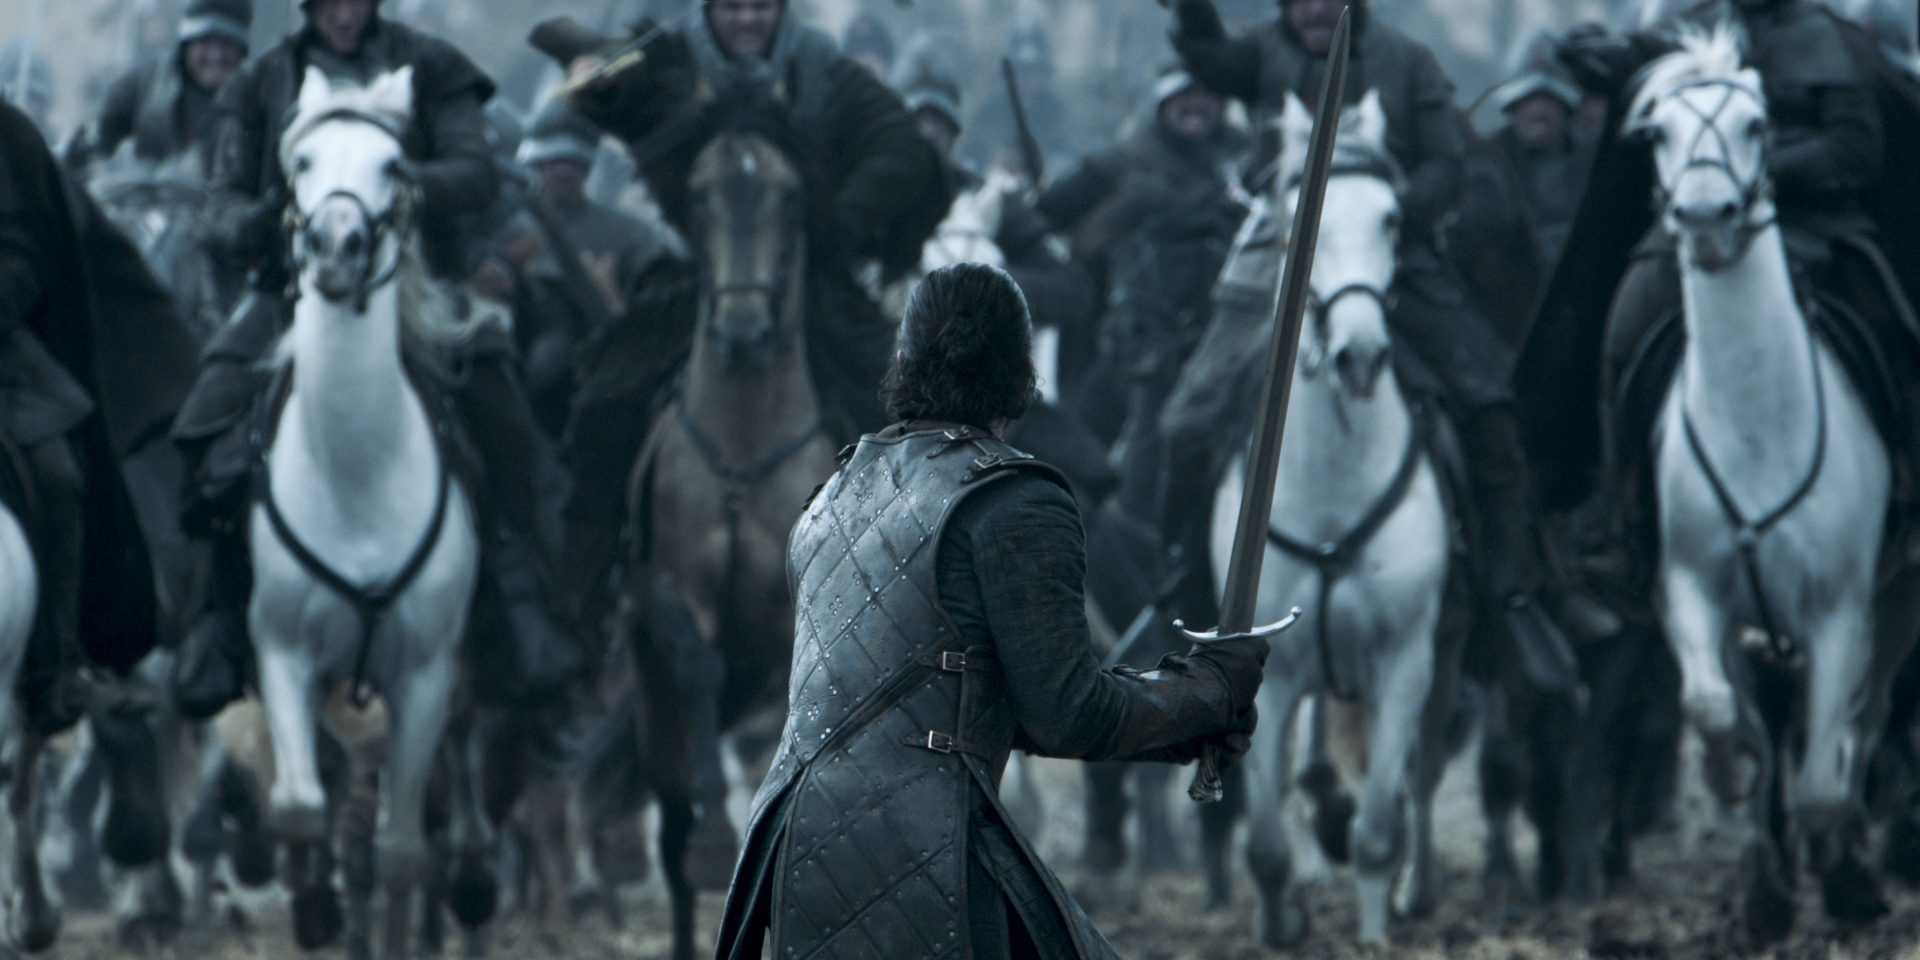

In [ ]:
img_file = "/content/sample.jpg"
img = cv2.imread(img_file)

cv2_imshow(img)

[[174 174 173 ...  88  63  35]
 [175 175 175 ...  87  63  35]
 [176 176 176 ...  87  62  35]
 ...
 [ 67  68  70 ... 140 143 145]
 [ 68  69  71 ... 137 141 144]
 [ 69  70  71 ... 135 140 143]]


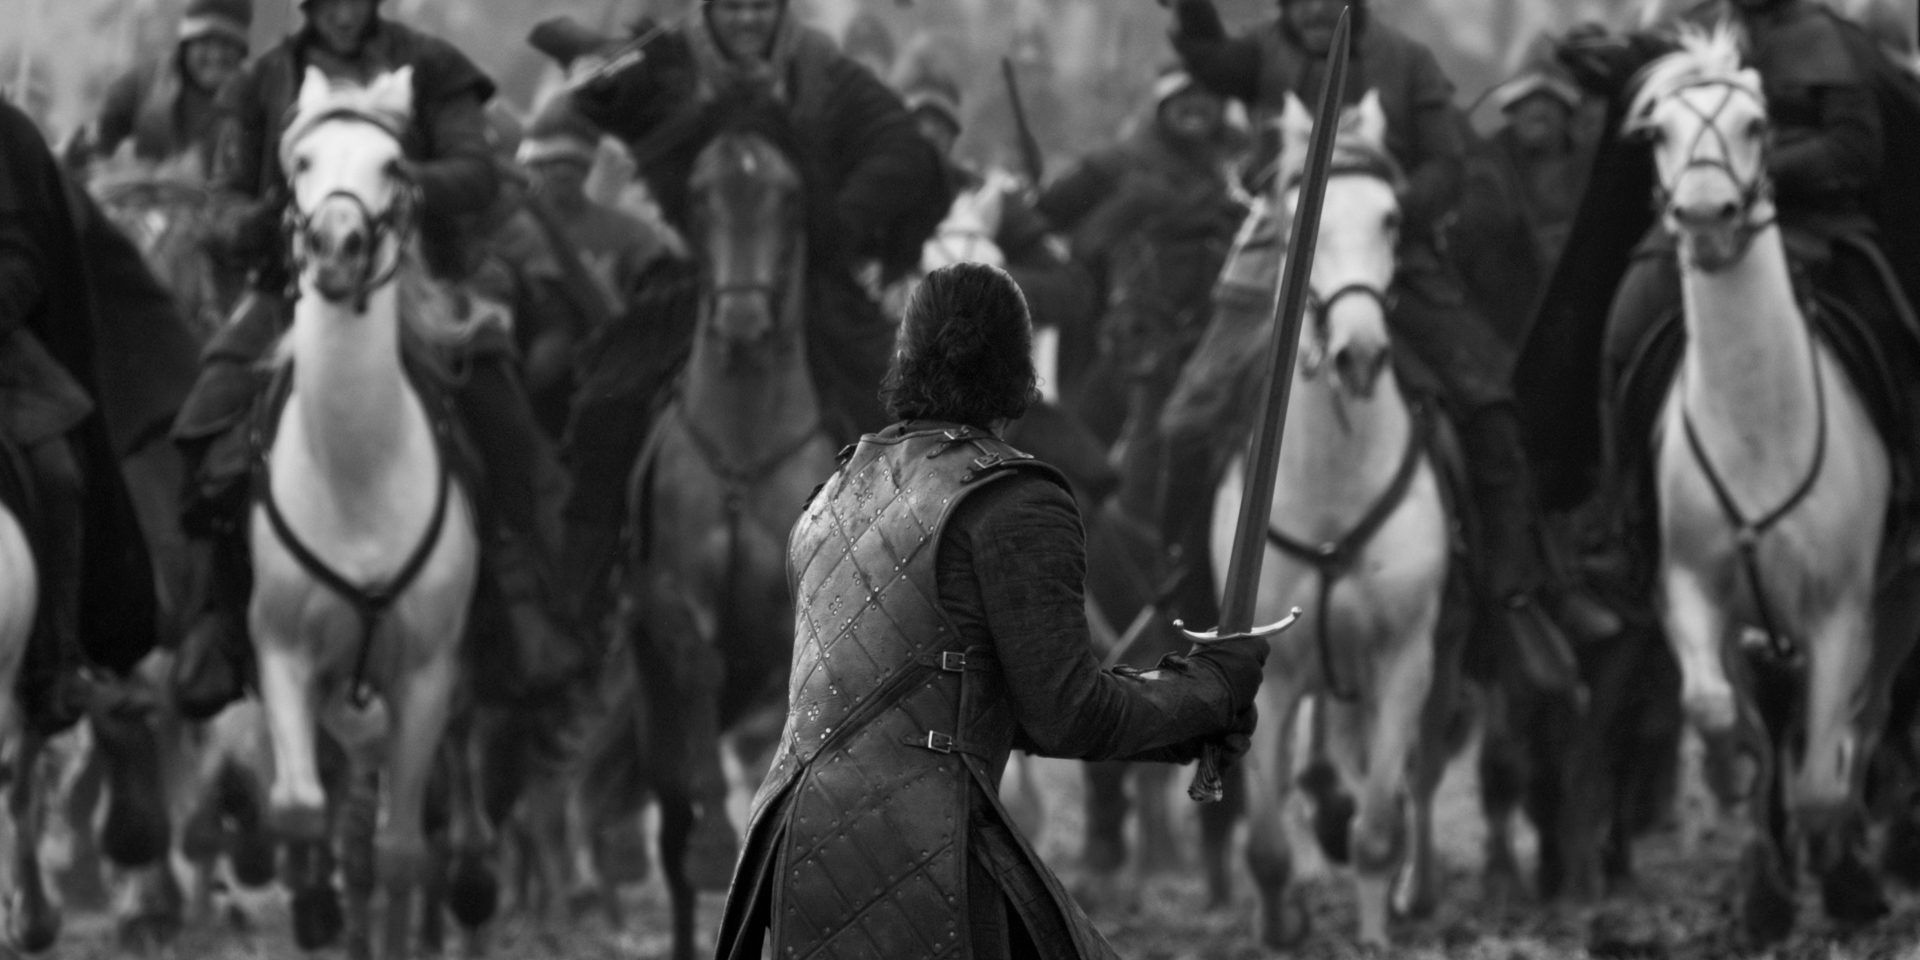

In [ ]:
# Convert the image to grayscale
grayscale_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(grayscale_image)

# Save the grayscale image
cv2.imwrite("/content/sample_grayscale.jpg", grayscale_image)

# Display the image
cv2_imshow(grayscale_image)

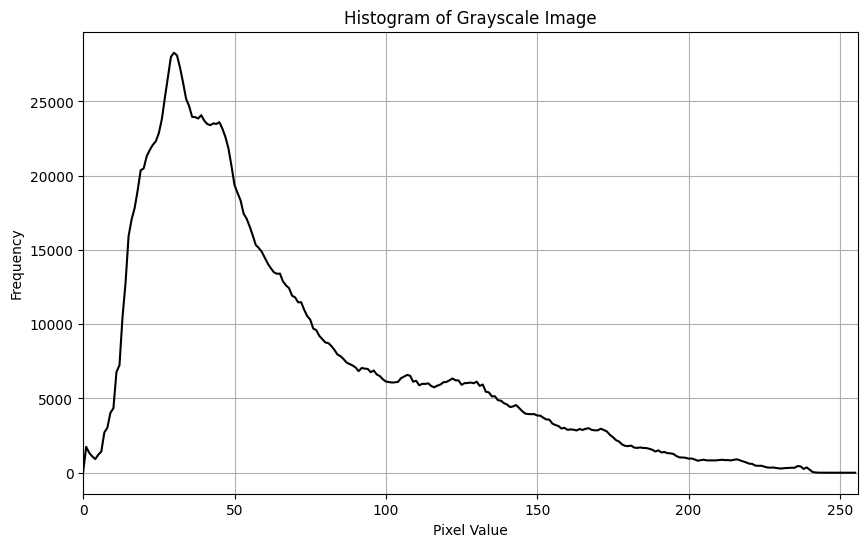

In [ ]:
from matplotlib import pyplot as plt

# Calculate the histogram
histogram = cv2.calcHist([grayscale_image], [0], None, [256], [0, 256])

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.plot(histogram, color='black')
plt.title("Histogram of Grayscale Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.grid(True)
plt.show()

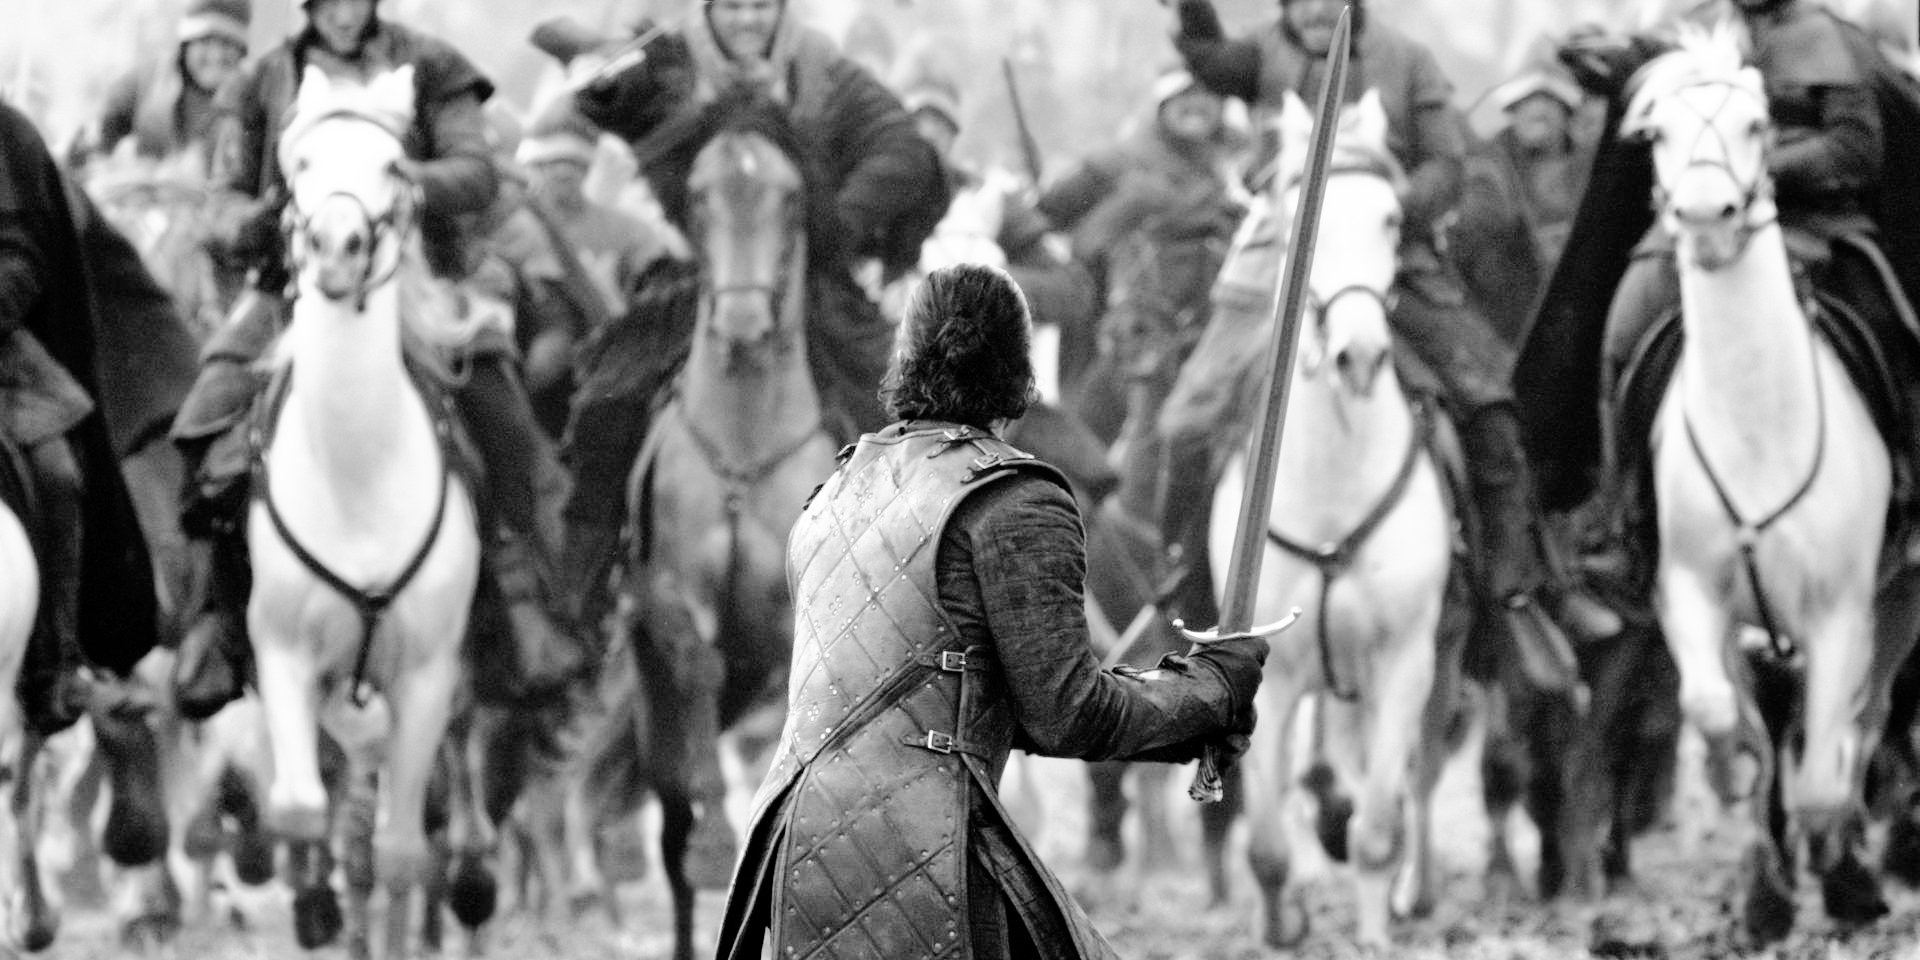

In [ ]:
# Apply histogram equalization
equalized_image = cv2.equalizeHist(grayscale_image)

# Save the equalized image
cv2.imwrite("/content/sample_equalized.jpg", equalized_image)

# Display the image
cv2_imshow(equalized_image)

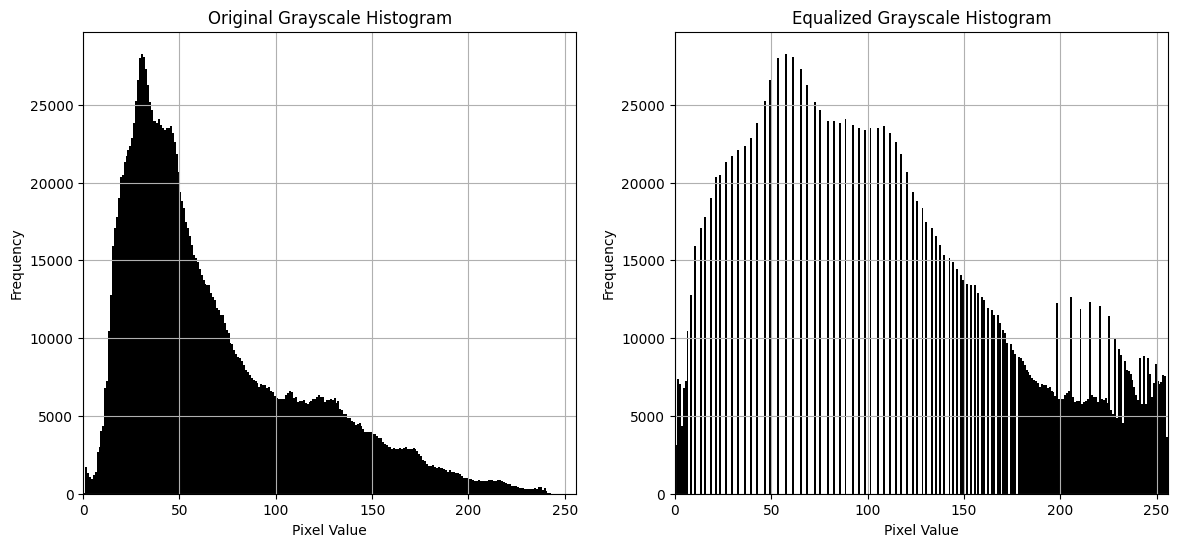

In [ ]:
# Plot the original and equalized histograms side by side
plt.figure(figsize=(14, 6))

# Original histogram
plt.subplot(1, 2, 1)
plt.hist(grayscale_image.ravel(), 256, [0, 256], color='black')
plt.title("Original Grayscale Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.grid(True)

# Equalized histogram
plt.subplot(1, 2, 2)
plt.hist(equalized_image.ravel(), 256, [0, 256], color='black')
plt.title("Equalized Grayscale Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.grid(True)

plt.show()